In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import astropy
import lsst.sims.featureScheduler as fs
from lsst.sims.utils import Site

/Users/yoachim/gitRepos/sims_featureScheduler/python/lsst/sims/featureScheduler/utils.py:27: UserWarning: Could not import ts.scheduler. This is required to load the FieldsDatabase. In this case
it will fallback to loading fields from the local "fieldID.lis" file.
  it will fallback to loading fields from the local "fieldID.lis" file.''')


In [2]:
# Let's load up the DD fields that are known to fs
dd_surveys = fs.generate_dd_surveys()
dd_to_try = 0

In [3]:
ra_rad = dd_surveys[dd_to_try].ra
dec_rad = dd_surveys[dd_to_try].dec

mjd0 = 59580.0381944435
length = 365.25 * 2
# What times do we want to use
timestep = 0.5 / 24.
mjds = np.arange(mjd0, mjd0+length, timestep)

In [4]:
names = ['mjd', 'sun_alt', 'moon_dist', 'airmass']
dtypes = [float]*len(names)
info = np.zeros(mjds.size, dtype=list(zip(names, dtypes)))

In [5]:
info['mjd'] = mjds

In [6]:
# Astropy times
times = astropy.time.Time(mjds, format='mjd')

In [7]:
site = Site(name='LSST')
location = astropy.coordinates.EarthLocation(site.longitude_rad,
                                             site.latitude_rad, site.height*astropy.units.m)

In [9]:
sun_position = astropy.coordinates.get_sun(times)
moon_position = astropy.coordinates.get_moon(times)

In [ ]:
sun_altaz = sun_position.transform_to(astropy.coordinates.AltAz(location=location))

In [23]:
dd_coord = astropy.coordinates.SkyCoord(ra_rad*astropy.units.rad, dec_rad*astropy.units.rad)

In [19]:
dd_alt_az = dd_coord.transform_to(astropy.coordinates.AltAz(location=location, obstime=times))

In [27]:
info['moon_dist'] = dd_coord.separation(moon_position).degree

In [28]:
info['moon_dist']

array([ 107.3261285 ,  107.34036723,  107.35460383, ...,  107.36130024,
        107.37630001,  107.39129672])

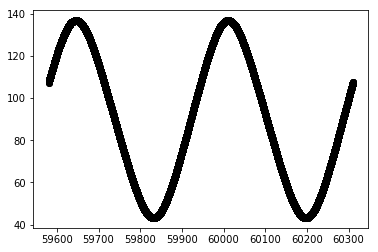

In [29]:
plt.plot(mjds, info['moon_dist'], 'ko')

(59900, 59902)

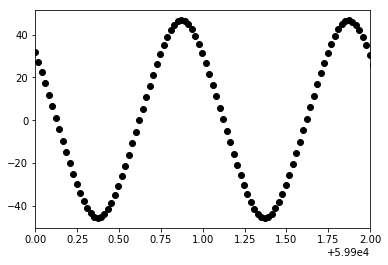

In [33]:
plt.plot(mjds, dd_alt_az.alt, 'ko')
plt.xlim([59900, 59902])